In [1]:
import os
import sys
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder

# Add the parent directory to path to import your modules
os.chdir("../..")
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from lib import *


Sparsity with L1 penalty: 80.31%
Test score with L1 penalty: 0.8195
Example run in 8.829 s


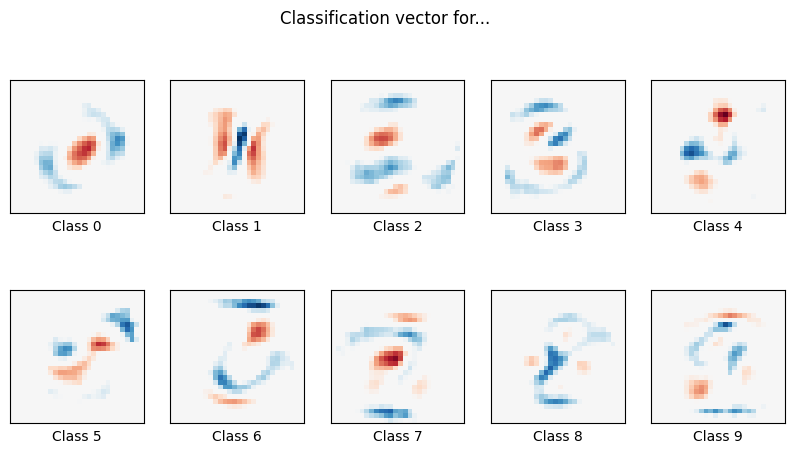

In [2]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [3]:
# Convert labels to one-hot encoding for neural network
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Create validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train_onehot, test_size=0.2, random_state=42
)

# Print dataset information
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Input features: {X_train.shape[1]}")
print(f"Output classes: {y_train_onehot.shape[1]}")

Training set: 4000 samples
Validation set: 1000 samples
Test set: 10000 samples
Input features: 784
Output classes: 10


### Pengaruh Inisialisasi Bobot

In [4]:
# Define depth
depth_variations = [
    [784, 156, 156, 10]
]

# Define activation functions
activation_variations = [
    [ReLU(), ReLU(), Softmax()]
]

In [5]:
# Create Neural Network
zero_init_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = CCE(),
    initialize_methods = ZeroInitializer()
)

normal_init_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

uniform_init_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = CCE(),
    initialize_methods = UniformInitializer(seed=22)
)

xavier_init_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = CCE(),
    initialize_methods = XavierInitializer(seed=22)
)

he_init_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = CCE(),
    initialize_methods = HeInitializer(seed=22)
)

In [6]:
# Create FFNN model
ffnn_zero_init = FFNN(zero_init_network)

ffnn_normal_init = FFNN(normal_init_network)

ffnn_uniform_init = FFNN(uniform_init_network)

ffnn_xavier_init = FFNN(xavier_init_network)

ffnn_he_init = FFNN(he_init_network)

In [7]:
# Train the model
zero_init_history = ffnn_zero_init.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

normal_init_history = ffnn_normal_init.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

uniform_init_history = ffnn_uniform_init.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

xavier_init_history = ffnn_xavier_init.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

he_init_history = ffnn_he_init.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 272.87it/s, loss=2.3024]


Epoch 1/20 - 0.49s - loss: 2.3024 - val_loss: 2.3025


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 160.25it/s, loss=2.3017]


Epoch 2/20 - 0.80s - loss: 2.3017 - val_loss: 2.3025


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 195.35it/s, loss=2.3013]


Epoch 3/20 - 0.66s - loss: 2.3013 - val_loss: 2.3025


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 212.89it/s, loss=2.3009]


Epoch 4/20 - 0.64s - loss: 2.3009 - val_loss: 2.3026


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 186.81it/s, loss=2.3006]


Epoch 5/20 - 0.70s - loss: 2.3006 - val_loss: 2.3027


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 184.37it/s, loss=2.3004]


Epoch 6/20 - 0.70s - loss: 2.3004 - val_loss: 2.3029


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 192.10it/s, loss=2.3002]


Epoch 7/20 - 0.67s - loss: 2.3002 - val_loss: 2.3030


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 209.95it/s, loss=2.3001]


Epoch 8/20 - 0.62s - loss: 2.3001 - val_loss: 2.3031


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 190.14it/s, loss=2.3000]


Epoch 9/20 - 0.69s - loss: 2.3000 - val_loss: 2.3033


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 125.44it/s, loss=2.2999]


Epoch 10/20 - 1.05s - loss: 2.2999 - val_loss: 2.3034


Epoch 11/20: 100%|██████████| 125/125 [00:01<00:00, 112.17it/s, loss=2.2998]


Epoch 11/20 - 1.16s - loss: 2.2998 - val_loss: 2.3035


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 141.83it/s, loss=2.2998]


Epoch 12/20 - 0.91s - loss: 2.2998 - val_loss: 2.3036


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 247.78it/s, loss=2.2998]


Epoch 13/20 - 0.52s - loss: 2.2998 - val_loss: 2.3037


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 199.37it/s, loss=2.2997]


Epoch 14/20 - 0.65s - loss: 2.2997 - val_loss: 2.3038


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 243.90it/s, loss=2.2997]


Epoch 15/20 - 0.53s - loss: 2.2997 - val_loss: 2.3039


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 238.01it/s, loss=2.2997]


Epoch 16/20 - 0.54s - loss: 2.2997 - val_loss: 2.3040


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 239.34it/s, loss=2.2997]


Epoch 17/20 - 0.55s - loss: 2.2997 - val_loss: 2.3041


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 108.59it/s, loss=2.2997]


Epoch 18/20 - 1.18s - loss: 2.2997 - val_loss: 2.3041


Epoch 19/20: 100%|██████████| 125/125 [00:01<00:00, 108.49it/s, loss=2.2997]


Epoch 19/20 - 1.19s - loss: 2.2997 - val_loss: 2.3042


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 179.17it/s, loss=2.2997]


Epoch 20/20 - 0.72s - loss: 2.2997 - val_loss: 2.3042


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 242.92it/s, loss=14.5850]


Epoch 1/20 - 0.53s - loss: 14.5850 - val_loss: 9.1788


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 231.90it/s, loss=6.5800]


Epoch 2/20 - 0.55s - loss: 6.5800 - val_loss: 5.2279


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 233.84it/s, loss=4.2314]


Epoch 3/20 - 0.55s - loss: 4.2314 - val_loss: 4.3214


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 232.04it/s, loss=3.0613]


Epoch 4/20 - 0.56s - loss: 3.0613 - val_loss: 4.2521


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 197.79it/s, loss=2.4425]


Epoch 5/20 - 0.65s - loss: 2.4425 - val_loss: 3.8774


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 203.41it/s, loss=1.9321]


Epoch 6/20 - 0.67s - loss: 1.9321 - val_loss: 3.7359


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 175.79it/s, loss=1.6149]


Epoch 7/20 - 0.76s - loss: 1.6149 - val_loss: 3.5724


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 240.54it/s, loss=1.4545]


Epoch 8/20 - 0.61s - loss: 1.4545 - val_loss: 3.4539


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 186.85it/s, loss=1.3179]


Epoch 9/20 - 0.68s - loss: 1.3179 - val_loss: 3.4405


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 144.91it/s, loss=1.2062]


Epoch 10/20 - 0.88s - loss: 1.2062 - val_loss: 3.3897


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 231.25it/s, loss=1.1641]


Epoch 11/20 - 0.57s - loss: 1.1641 - val_loss: 3.3662


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 214.01it/s, loss=1.1311]


Epoch 12/20 - 0.60s - loss: 1.1311 - val_loss: 3.3265


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 229.64it/s, loss=1.1205]


Epoch 13/20 - 0.59s - loss: 1.1205 - val_loss: 3.2924


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 230.08it/s, loss=1.1069]


Epoch 14/20 - 0.57s - loss: 1.1069 - val_loss: 3.3225


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 232.90it/s, loss=1.0986]


Epoch 15/20 - 0.55s - loss: 1.0986 - val_loss: 3.2810


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 198.35it/s, loss=1.0967]


Epoch 16/20 - 0.67s - loss: 1.0967 - val_loss: 3.2772


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 235.60it/s, loss=1.0967]


Epoch 17/20 - 0.55s - loss: 1.0967 - val_loss: 3.2770


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 162.49it/s, loss=1.0967]


Epoch 18/20 - 0.79s - loss: 1.0967 - val_loss: 3.2768


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 157.29it/s, loss=1.0966]


Epoch 19/20 - 0.83s - loss: 1.0966 - val_loss: 3.2766


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 166.26it/s, loss=1.0966]


Epoch 20/20 - 0.78s - loss: 1.0966 - val_loss: 3.2765


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 153.37it/s, loss=2.2738]


Epoch 1/20 - 0.86s - loss: 2.2738 - val_loss: 2.2378


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 182.71it/s, loss=2.1746]


Epoch 2/20 - 0.72s - loss: 2.1746 - val_loss: 2.0934


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 192.84it/s, loss=1.9474]


Epoch 3/20 - 0.67s - loss: 1.9474 - val_loss: 1.7794


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 167.99it/s, loss=1.5535]


Epoch 4/20 - 0.77s - loss: 1.5535 - val_loss: 1.3486


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 187.54it/s, loss=1.1402]


Epoch 5/20 - 0.69s - loss: 1.1402 - val_loss: 0.9845


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 214.08it/s, loss=0.8380]


Epoch 6/20 - 0.61s - loss: 0.8380 - val_loss: 0.7462


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 198.11it/s, loss=0.6508]


Epoch 7/20 - 0.65s - loss: 0.6508 - val_loss: 0.6063


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 202.09it/s, loss=0.5321]


Epoch 8/20 - 0.66s - loss: 0.5321 - val_loss: 0.5188


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 210.67it/s, loss=0.4517]


Epoch 9/20 - 0.62s - loss: 0.4517 - val_loss: 0.4568


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 158.73it/s, loss=0.3931]


Epoch 10/20 - 0.81s - loss: 0.3931 - val_loss: 0.4184


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 177.80it/s, loss=0.3498]


Epoch 11/20 - 0.73s - loss: 0.3498 - val_loss: 0.3864


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 176.02it/s, loss=0.3148]


Epoch 12/20 - 0.73s - loss: 0.3148 - val_loss: 0.3660


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 175.46it/s, loss=0.2873]


Epoch 13/20 - 0.74s - loss: 0.2873 - val_loss: 0.3499


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 155.82it/s, loss=0.2640]


Epoch 14/20 - 0.82s - loss: 0.2640 - val_loss: 0.3332


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 171.74it/s, loss=0.2440]


Epoch 15/20 - 0.76s - loss: 0.2440 - val_loss: 0.3227


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 178.15it/s, loss=0.2266]


Epoch 16/20 - 0.73s - loss: 0.2266 - val_loss: 0.3120


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 165.13it/s, loss=0.2111]


Epoch 17/20 - 0.78s - loss: 0.2111 - val_loss: 0.3066


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 156.21it/s, loss=0.1971]


Epoch 18/20 - 0.82s - loss: 0.1971 - val_loss: 0.2988


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 203.37it/s, loss=0.1847]


Epoch 19/20 - 0.65s - loss: 0.1847 - val_loss: 0.2937


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 208.03it/s, loss=0.1730]


Epoch 20/20 - 0.62s - loss: 0.1730 - val_loss: 0.2884


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 194.51it/s, loss=1.5629]


Epoch 1/20 - 0.66s - loss: 1.5629 - val_loss: 0.9806


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 165.03it/s, loss=0.7220]


Epoch 2/20 - 0.79s - loss: 0.7220 - val_loss: 0.6265


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 182.10it/s, loss=0.4802]


Epoch 3/20 - 0.71s - loss: 0.4802 - val_loss: 0.4899


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 190.76it/s, loss=0.3702]


Epoch 4/20 - 0.68s - loss: 0.3702 - val_loss: 0.4282


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 143.99it/s, loss=0.3045]


Epoch 5/20 - 0.89s - loss: 0.3045 - val_loss: 0.3917


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 179.06it/s, loss=0.2605]


Epoch 6/20 - 0.72s - loss: 0.2605 - val_loss: 0.3657


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 183.66it/s, loss=0.2267]


Epoch 7/20 - 0.71s - loss: 0.2267 - val_loss: 0.3433


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 176.59it/s, loss=0.2003]


Epoch 8/20 - 0.72s - loss: 0.2003 - val_loss: 0.3317


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 179.54it/s, loss=0.1789]


Epoch 9/20 - 0.73s - loss: 0.1789 - val_loss: 0.3185


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 165.34it/s, loss=0.1612]


Epoch 10/20 - 0.78s - loss: 0.1612 - val_loss: 0.3092


Epoch 11/20: 100%|██████████| 125/125 [00:01<00:00, 103.71it/s, loss=0.1454]


Epoch 11/20 - 1.30s - loss: 0.1454 - val_loss: 0.3029


Epoch 12/20: 100%|██████████| 125/125 [00:01<00:00, 81.49it/s, loss=0.1323]


Epoch 12/20 - 1.56s - loss: 0.1323 - val_loss: 0.2975


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 102.59it/s, loss=0.1208]


Epoch 13/20 - 1.26s - loss: 0.1208 - val_loss: 0.2935


Epoch 14/20: 100%|██████████| 125/125 [00:01<00:00, 122.52it/s, loss=0.1104]


Epoch 14/20 - 1.07s - loss: 0.1104 - val_loss: 0.2880


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 144.44it/s, loss=0.1014]


Epoch 15/20 - 0.89s - loss: 0.1014 - val_loss: 0.2866


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 152.60it/s, loss=0.0932]


Epoch 16/20 - 0.84s - loss: 0.0932 - val_loss: 0.2818


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 165.10it/s, loss=0.0861]


Epoch 17/20 - 0.79s - loss: 0.0861 - val_loss: 0.2797


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 130.05it/s, loss=0.0792]


Epoch 18/20 - 0.99s - loss: 0.0792 - val_loss: 0.2758


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 143.58it/s, loss=0.0735]


Epoch 19/20 - 0.90s - loss: 0.0735 - val_loss: 0.2746


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 152.59it/s, loss=0.0684]


Epoch 20/20 - 0.85s - loss: 0.0684 - val_loss: 0.2738


Epoch 1/20: 100%|██████████| 125/125 [00:01<00:00, 119.65it/s, loss=1.3204]


Epoch 1/20 - 1.07s - loss: 1.3204 - val_loss: 0.7373


Epoch 2/20: 100%|██████████| 125/125 [00:01<00:00, 124.09it/s, loss=0.5503]


Epoch 2/20 - 1.04s - loss: 0.5503 - val_loss: 0.5175


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 125.27it/s, loss=0.3775]


Epoch 3/20 - 1.02s - loss: 0.3775 - val_loss: 0.4386


Epoch 4/20: 100%|██████████| 125/125 [00:01<00:00, 91.55it/s, loss=0.2934] 


Epoch 4/20 - 1.41s - loss: 0.2934 - val_loss: 0.3930


Epoch 5/20: 100%|██████████| 125/125 [00:01<00:00, 101.48it/s, loss=0.2406]


Epoch 5/20 - 1.30s - loss: 0.2406 - val_loss: 0.3719


Epoch 6/20: 100%|██████████| 125/125 [00:01<00:00, 73.78it/s, loss=0.2042]


Epoch 6/20 - 1.73s - loss: 0.2042 - val_loss: 0.3548


Epoch 7/20: 100%|██████████| 125/125 [00:01<00:00, 94.09it/s, loss=0.1761]


Epoch 7/20 - 1.36s - loss: 0.1761 - val_loss: 0.3405


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 125.86it/s, loss=0.1544]


Epoch 8/20 - 1.02s - loss: 0.1544 - val_loss: 0.3342


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 129.10it/s, loss=0.1361]


Epoch 9/20 - 1.01s - loss: 0.1361 - val_loss: 0.3224


Epoch 10/20: 100%|██████████| 125/125 [00:01<00:00, 120.30it/s, loss=0.1210]


Epoch 10/20 - 1.07s - loss: 0.1210 - val_loss: 0.3174


Epoch 11/20: 100%|██████████| 125/125 [00:01<00:00, 114.96it/s, loss=0.1084]


Epoch 11/20 - 1.12s - loss: 0.1084 - val_loss: 0.3175


Epoch 12/20: 100%|██████████| 125/125 [00:02<00:00, 48.70it/s, loss=0.0975]


Epoch 12/20 - 2.68s - loss: 0.0975 - val_loss: 0.3128


Epoch 13/20: 100%|██████████| 125/125 [00:02<00:00, 53.86it/s, loss=0.0884]


Epoch 13/20 - 2.37s - loss: 0.0884 - val_loss: 0.3110


Epoch 14/20: 100%|██████████| 125/125 [00:01<00:00, 121.34it/s, loss=0.0803]


Epoch 14/20 - 1.06s - loss: 0.0803 - val_loss: 0.3107


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 178.65it/s, loss=0.0731]


Epoch 15/20 - 0.72s - loss: 0.0731 - val_loss: 0.3071


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 134.89it/s, loss=0.0670]


Epoch 16/20 - 0.96s - loss: 0.0670 - val_loss: 0.3057


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 161.78it/s, loss=0.0614]


Epoch 17/20 - 0.79s - loss: 0.0614 - val_loss: 0.3066


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 169.26it/s, loss=0.0567]


Epoch 18/20 - 0.76s - loss: 0.0567 - val_loss: 0.3047


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 169.51it/s, loss=0.0523]


Epoch 19/20 - 0.76s - loss: 0.0523 - val_loss: 0.3030


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 184.26it/s, loss=0.0484]

Epoch 20/20 - 0.71s - loss: 0.0484 - val_loss: 0.3021


In [8]:
# Evaluate the model
evaluate_model(ffnn_zero_init, X_test, y_test_onehot)

evaluate_model(ffnn_normal_init, X_test, y_test_onehot)

evaluate_model(ffnn_uniform_init, X_test, y_test_onehot)

evaluate_model(ffnn_xavier_init, X_test, y_test_onehot)

evaluate_model(ffnn_he_init, X_test, y_test_onehot)

/home/dovodedomo/Tugas-Besar-I-ML/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.1091000000
Precision (macro)    0.0109100000
Recall (macro)       0.1000000000
F1 Score (macro)     0.0196736092
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8396000000
Precision (macro)    0.8391032168
Recall (macro)       0.8388527512
F1 Score (macro)     0.8386456003
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8991000000
Precision (macro)    0.8986023715
Recall (macro)       0.8985286441
F1 Score (macro)     0.8984839249
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.9035000000
Precision (macro)    0.9029991755
Recall (macro)       0.

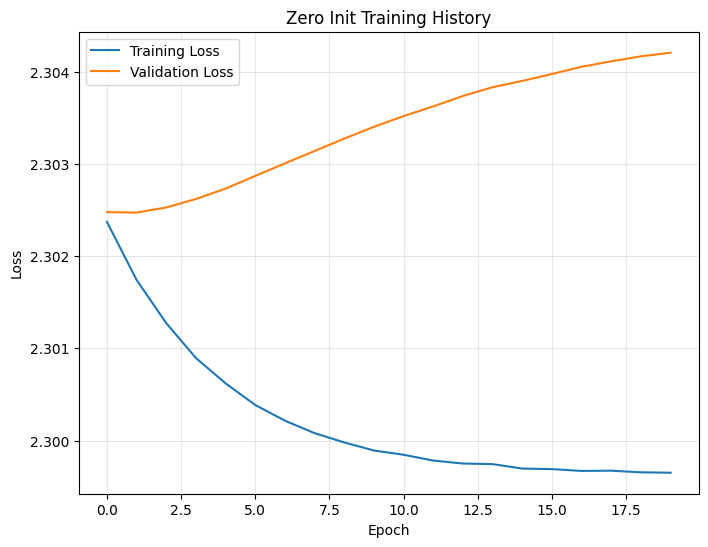

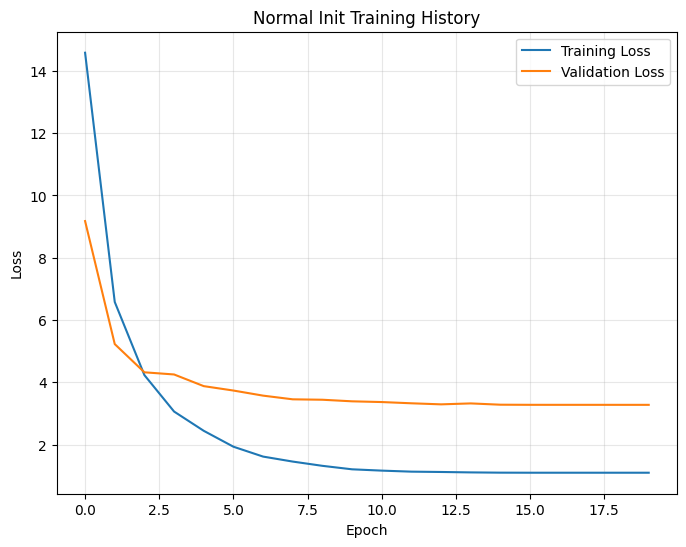

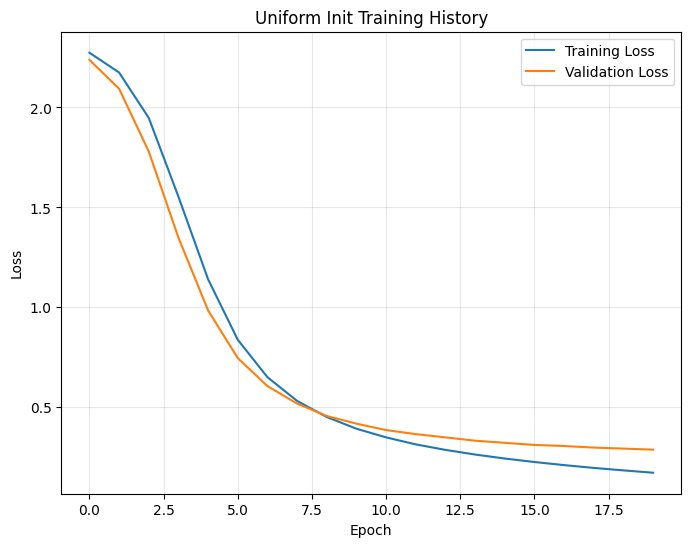

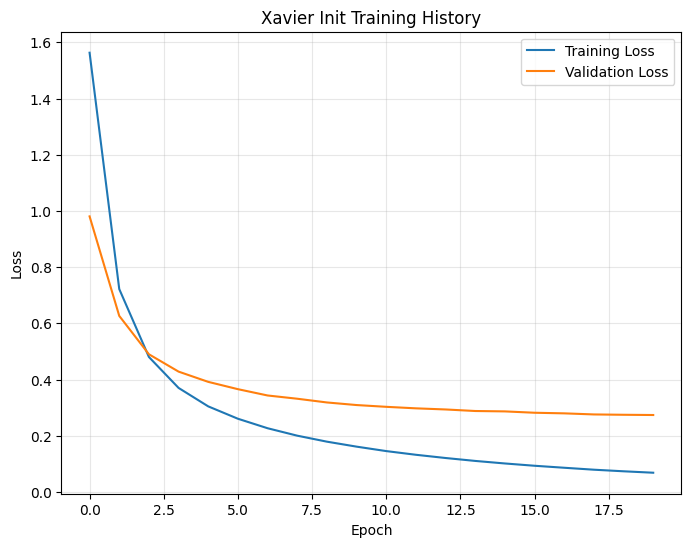

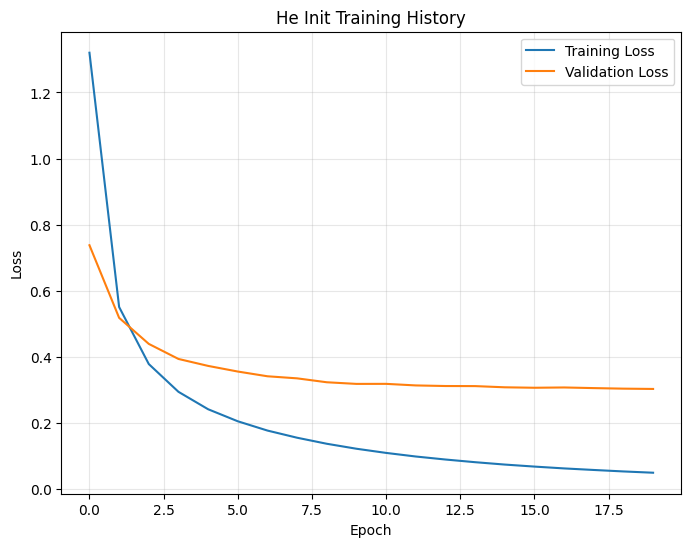

In [9]:
# Plot the training history
plot_training_loss(zero_init_history, "Zero Init Training History")

plot_training_loss(normal_init_history, "Normal Init Training History")

plot_training_loss(uniform_init_history, "Uniform Init Training History")

plot_training_loss(xavier_init_history, "Xavier Init Training History")

plot_training_loss(he_init_history, "He Init Training History")

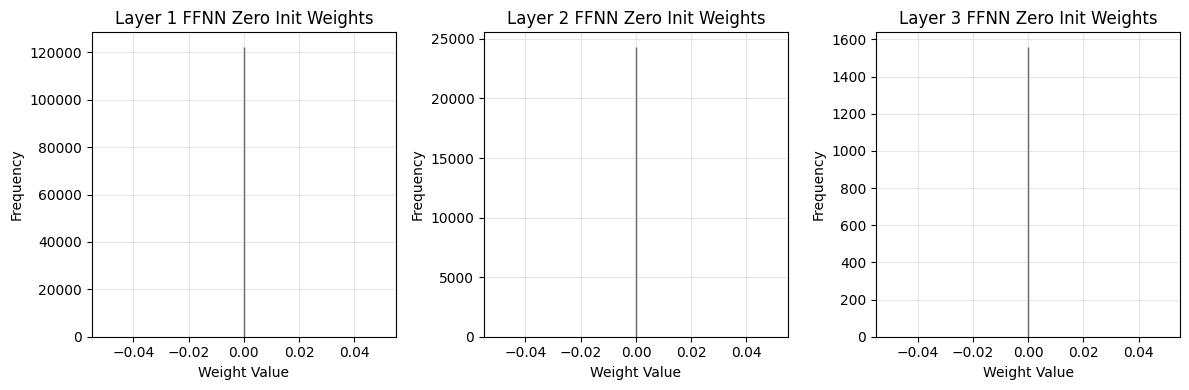

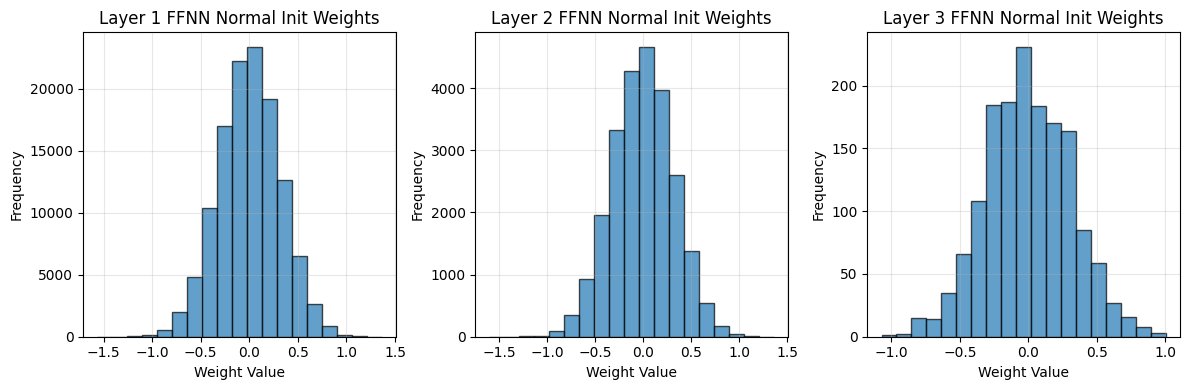

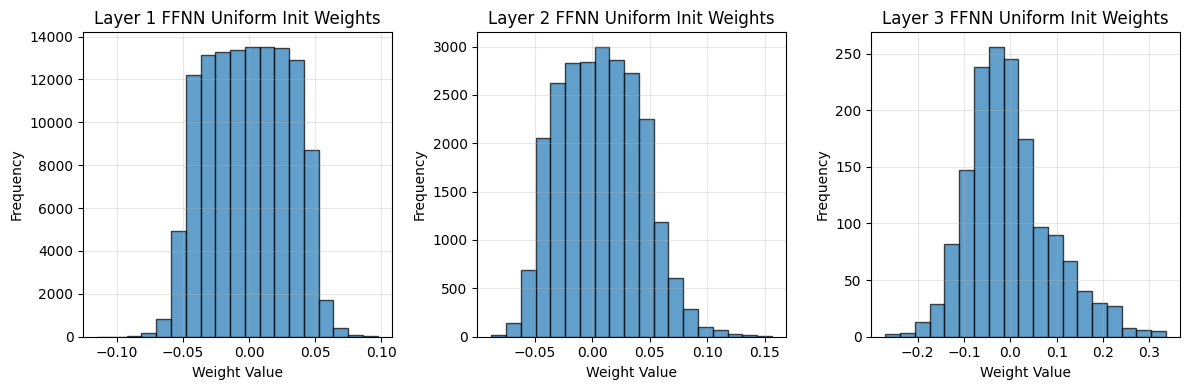

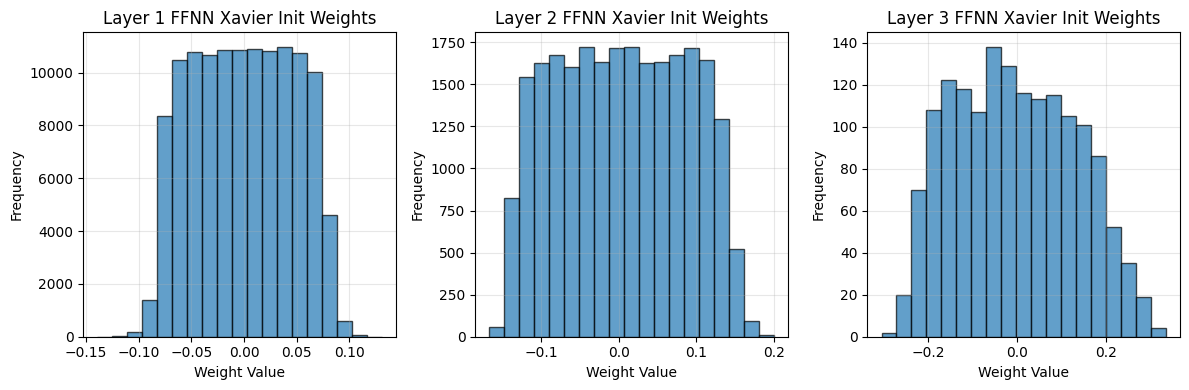

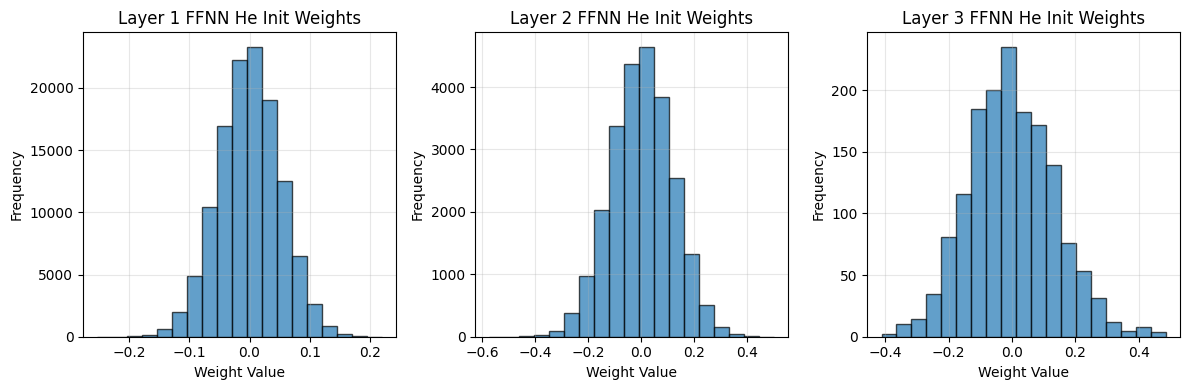

In [10]:
# Plot Weights
ffnn_zero_init.plot_weights(title="FFNN Zero Init Weights")

ffnn_normal_init.plot_weights(title="FFNN Normal Init Weights")

ffnn_uniform_init.plot_weights(title="FFNN Uniform Init Weights")

ffnn_xavier_init.plot_weights(title="FFNN Xavier Init Weights")

ffnn_he_init.plot_weights(title="FFNN He Init Weights")

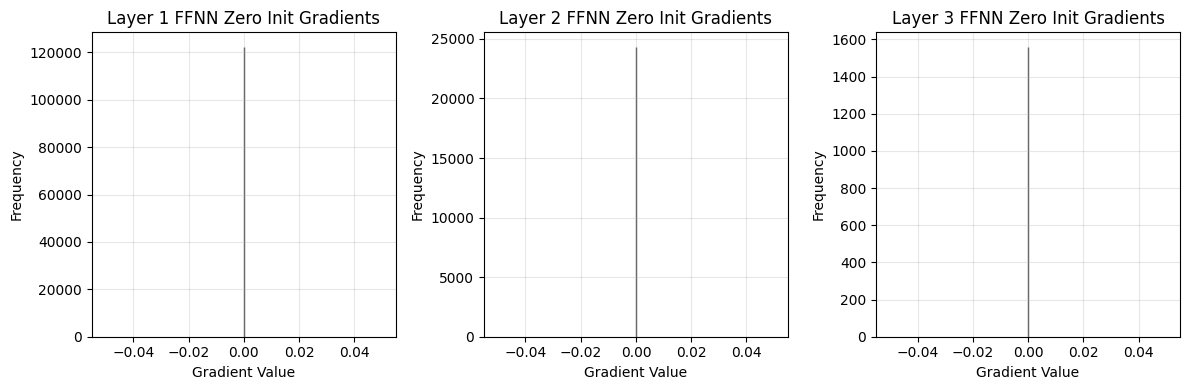

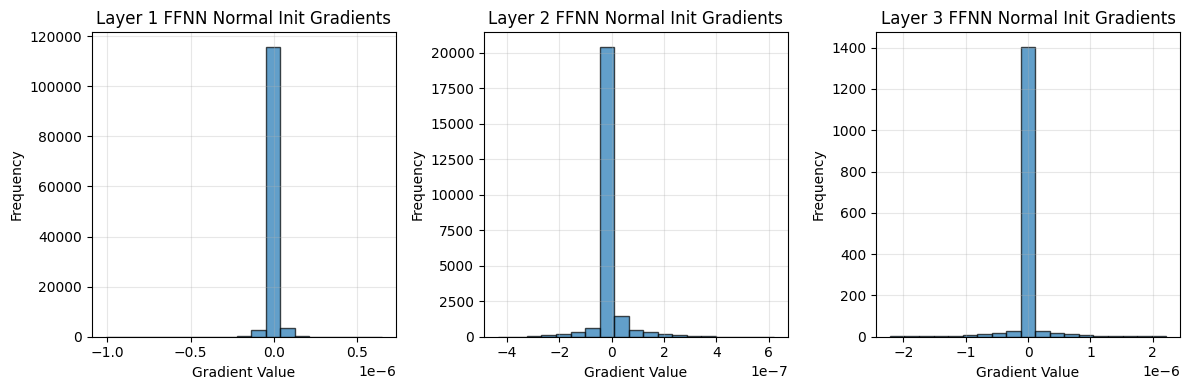

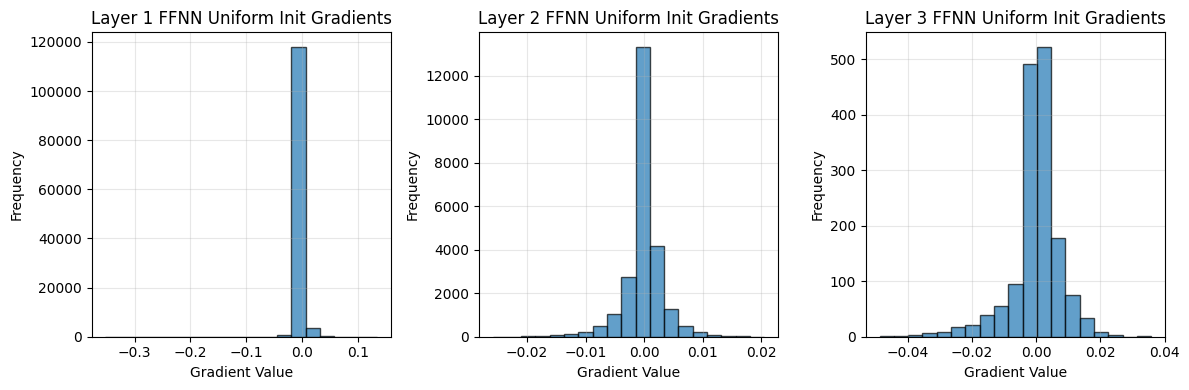

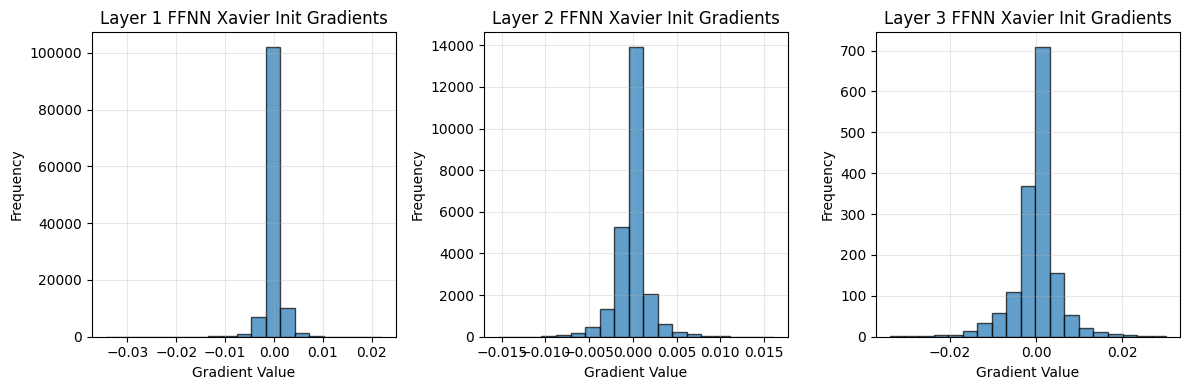

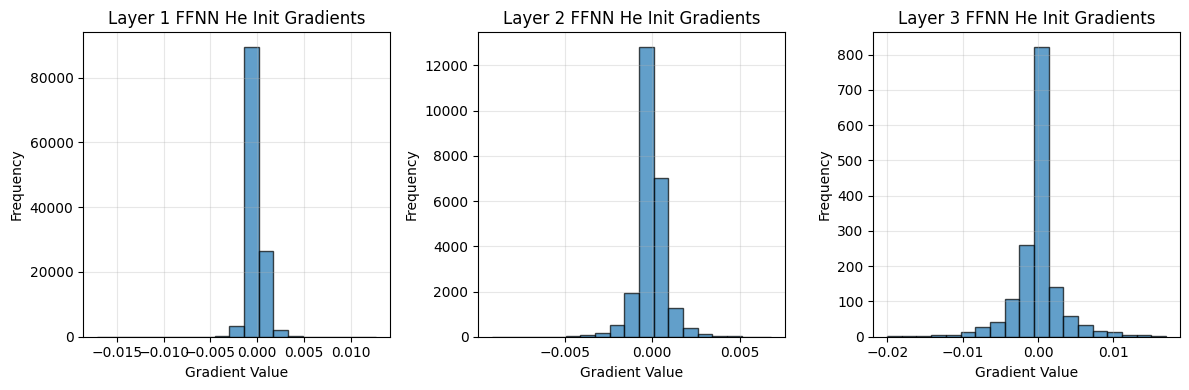

In [11]:
# Plot Gradient of Weights
ffnn_zero_init.plot_gradients(title="FFNN Zero Init Gradients")

ffnn_normal_init.plot_gradients(title="FFNN Normal Init Gradients")

ffnn_uniform_init.plot_gradients(title="FFNN Uniform Init Gradients")

ffnn_xavier_init.plot_gradients(title="FFNN Xavier Init Gradients")

ffnn_he_init.plot_gradients(title="FFNN He Init Gradients")